In [0]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from tqdm import tqdm_notebook as tqdm

from sklearn.metrics import mean_squared_log_error

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train=pd.read_csv('/content/drive/My Drive/data/traing.csv')
sub=pd.read_csv('/content/drive/My Drive/data/SampleSubmission.csv')
test=sub

In [19]:
test["Territory"], test["Date"] = test["Territory X Date"].str.split(" X ", 1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [0]:
    test['Date'] = pd.to_datetime(test['Date'])
    test['year'] = test['Date'].dt.year
    test['month'] = test['Date'].dt.month
    test['day'] = test['Date'].dt.day

In [0]:
    train['Date'] = pd.to_datetime(train['Date'])
    train['year'] = train['Date'].dt.year
    train['month'] = train['Date'].dt.month
    train['day'] = train['Date'].dt.day

In [0]:
valid=train.query('Date>="2020-04-02" and Date<="2020-04-08"')

In [0]:
test=test.query('Date>"2020-04-01"')

In [0]:
train=train.query('Date<="2020-04-01"')

In [0]:
valid

,Territory X Date,target,cases,Territory,Date,year,month,day


In [0]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

parameters = {'alpha':[1, 10]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(x,x_test)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
model=best_model

ValueError: ignored

In [0]:
from sklearn import linear_model
model = linear_model.BayesianRidge()

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [47]:
log_target = True
plot = False

test['cases'] = np.nan
test['target'] = np.nan

countries = train['Territory'].unique()
test_countries = test['Territory'].unique()

predictions = []
for c in tqdm(countries):
    train_df = train[train['Territory'] == c]   
    if c in test_countries:
            test_df = test[test['Territory'] == c]            
            cases = train_df['cases'].values[-3:]
            target = train_df['target'].values[-3:]
            
            if log_target:
                cases = np.log1p(cases)
                target = np.log1p(target)

            if np.sum(cases) > 0 :               
               
                x = np.arange(len(cases)).reshape(-1, 1)
                x_test = len(cases) + np.arange(len(test_df)).reshape(-1, 1)  
                model=linear_model.Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.01)
                model.fit(x,cases)
               
                p_conf = model.predict(x_test)
                p_conf = np.clip(p_conf, 0, None)
                p_conf = p_conf - np.min(p_conf) + cases[-1]
                if log_target:
                    p_conf = np.expm1(p_conf)
                test.loc[(test['Territory'] == c), 'cases'] = p_conf
                
                
                # create and fit a ridge regression model, testing each alpha
                model=linear_model.Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.01)
                model.fit(x,target)
                p_fatal = model.predict(x_test)
                p_fatal = np.clip(p_fatal, 0, None)
                p_fatal = p_fatal - np.min(p_fatal) + target[-1]
                if log_target:
                    p_fatal = np.expm1(p_fatal)
                test.loc[(test['Territory'] == c) , 'target'] = p_fatal
                
                if plot:
                    plt.figure();
                    #plt.plot(x, cases);
                    plt.plot(x, target);
                    #plt.plot(x_test, p_conf);
                    plt.plot(x_test, p_fatal);
                    plt.title(c);
            
test[['cases', 'target']] = test[['cases', 'target']].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_p

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [48]:

valid.sort_values(['Territory', 'Date'], inplace=True)
preds = test.sort_values(['Territory', 'Date'])
preds = valid[['Territory', 'Date']].merge(preds, on=['Territory', 'Date'], how='left')
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(valid['target'], preds['target']))

MAE:  71.96639720073047


In [0]:
preds

,Territory,Date,Territory X Date,target,year,month,day,cases
0,Afghanistan,2020-04-03,Afghanistan X 4/3/20,4.0,2020,4,3,250.482112
1,Afghanistan,2020-04-04,Afghanistan X 4/4/20,4.0,2020,4,4,264.727951
2,Afghanistan,2020-04-05,Afghanistan X 4/5/20,4.0,2020,4,5,279.780783
3,Afghanistan,2020-04-06,Afghanistan X 4/6/20,4.0,2020,4,6,295.686320
4,Afghanistan,2020-04-07,Afghanistan X 4/7/20,4.0,2020,4,7,312.492866
...,...,...,...,...,...,...,...,...
1249,Zimbabwe,2020-04-04,Zimbabwe X 4/4/20,1.0,2020,4,4,8.360377
1250,Zimbabwe,2020-04-05,Zimbabwe X 4/5/20,1.0,2020,4,5,8.545942
1251,Zimbabwe,2020-04-06,Zimbabwe X 4/6/20,1.0,2020,4,6,8.735185
1252,Zimbabwe,2020-04-07,Zimbabwe X 4/7/20,1.0,2020,4,7,8.928179


In [0]:
valid[['Territory', 'Date']].merge(preds, on=['Territory', 'Date'], how='left')

,Territory,Date,Territory X Date,target,year,month,day,cases
0,Afghanistan,2020-04-02,Afghanistan X 4/2/20,4.0,2020.0,4.0,2.0,237.000000
1,Afghanistan,2020-04-03,Afghanistan X 4/3/20,4.0,2020.0,4.0,3.0,274.509362
2,Afghanistan,2020-04-04,Afghanistan X 4/4/20,4.0,2020.0,4.0,4.0,317.930289
3,Afghanistan,2020-04-05,Afghanistan X 4/5/20,4.0,2020.0,4.0,5.0,368.194456
4,Afghanistan,2020-04-06,Afghanistan X 4/6/20,4.0,2020.0,4.0,6.0,426.380374
...,...,...,...,...,...,...,...,...
3548,Zimbabwe,2020-04-14,NaN,NaN,NaN,NaN,NaN,NaN
3549,Zimbabwe,2020-04-15,NaN,NaN,NaN,NaN,NaN,NaN
3550,Zimbabwe,2020-04-16,NaN,NaN,NaN,NaN,NaN,NaN
3551,Zimbabwe,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN


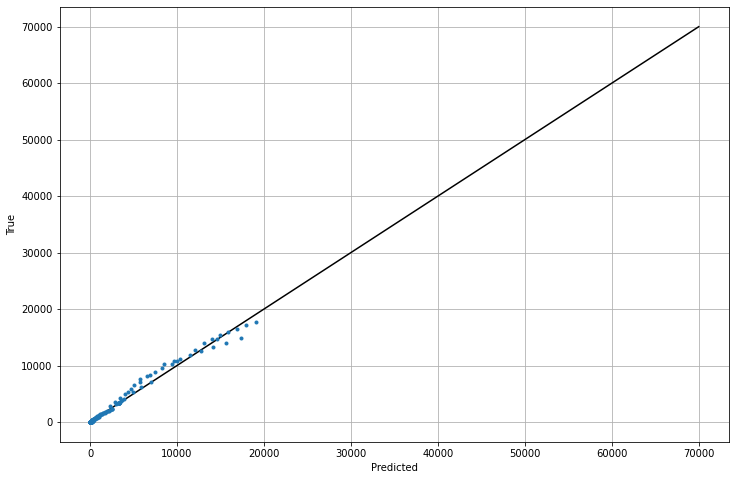

In [0]:
plt.figure(figsize=(12, 8))
plt.plot([0, 70000], [0, 70000], 'black')
plt.plot(preds['target'], valid['target'], '.')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid()



In [0]:
test

,Territory X Date,target,Territory,Date,year,month,day,cases
38,Afghanistan X 4/13/20,18.000000,Afghanistan,2020-04-13,2020,4,13,607.000000
39,Afghanistan X 4/14/20,19.864197,Afghanistan,2020-04-14,2020,4,14,652.496960
40,Afghanistan X 4/15/20,21.911300,Afghanistan,2020-04-15,2020,4,15,701.398481
41,Afghanistan X 4/16/20,24.159256,Afghanistan,2020-04-16,2020,4,16,753.959328
42,Afghanistan X 4/17/20,26.627772,Afghanistan,2020-04-17,2020,4,17,810.453332
...,...,...,...,...,...,...,...,...
19641,Zimbabwe X 6/3/20,648.146062,Zimbabwe,2020-06-03,2020,6,3,219.844524
19642,Zimbabwe X 6/4/20,716.267739,Zimbabwe,2020-06-04,2020,6,4,231.802964
19643,Zimbabwe X 6/5/20,791.538136,Zimbabwe,2020-06-05,2020,6,5,244.408938
19644,Zimbabwe X 6/6/20,874.707442,Zimbabwe,2020-06-06,2020,6,6,257.697508


In [0]:
submission = pd.DataFrame({
        "Territory X Date": test["Territory X Date"],
        "target": test['target']
    })
submission.to_csv('/content/drive/My Drive/data/submission5.csv', index=False)

In [0]:
test.query('Territory=="Algeria"')

,Territory X Date,target,Territory,Date,year,month,day,cases
215,Algeria X 4/2/20,58.000000,Algeria,2020-04-02,2020,4,2,847.000000
216,Algeria X 4/3/20,64.396246,Algeria,2020-04-03,2020,4,3,923.023253
217,Algeria X 4/4/20,71.485915,Algeria,2020-04-04,2020,4,4,1005.861996
218,Algeria X 4/5/20,79.344181,Algeria,2020-04-05,2020,4,5,1096.127237
219,Algeria X 4/6/20,88.054370,Algeria,2020-04-06,2020,4,6,1194.484762
...,...,...,...,...,...,...,...,...
277,Algeria X 6/3/20,34856.959571,Algeria,2020-06-03,2020,6,3,173856.263221
278,Algeria X 6/4/20,38635.943916,Algeria,2020-06-04,2020,6,4,189442.577766
279,Algeria X 6/5/20,42824.611526,Algeria,2020-06-05,2020,6,5,206426.206387
280,Algeria X 6/6/20,47467.376550,Algeria,2020-06-06,2020,6,6,224932.418378


In [0]:
train.Territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas (the)', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros (the)', 'Congo (the)', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea (the)",
       'Democratic Republic of the Congo (the)', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic (the)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

In [0]:
test1

,Territory X Date,target,Territory,Date,year,month,day,cases
1232,Spain X 4/2/20,9387.000000,Spain,2020-04-02,2020,4,2,104118.000000
1233,Spain X 4/3/20,10960.171824,Spain,2020-04-03,2020,4,3,117449.937997
1234,Spain X 4/4/20,12796.964183,Spain,2020-04-04,2020,4,4,132488.966638
1235,Spain X 4/5/20,14941.552664,Spain,2020-04-05,2020,4,5,149453.670682
1236,Spain X 4/6/20,17445.515470,Spain,2020-04-06,2020,4,6,168590.623620
1237,Spain X 4/7/20,20369.073903,Spain,2020-04-07,2020,4,7,190177.971490
1238,Spain X 4/8/20,23782.540702,Spain,2020-04-08,2020,4,8,214529.475598


ValueError: ignored

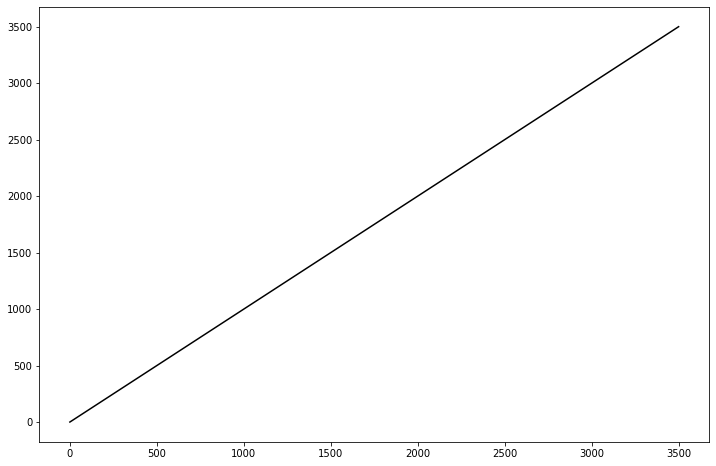

In [0]:

plt.figure(figsize=(12, 8))
plt.plot([0, 3500], [0, 3500], 'black')
plt.plot(x, x_test)
plt.plot(x, )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid()

In [0]:
preds = pd.merge(valid,test, on=['Territory','year','month','day'], how='left')



KeyError: ignored

In [0]:
valid

,Id,Province_State,Territory,Date,ConfirmedCases,Fatalities,year,month,day
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,2020,1,22
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,2020,1,23
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,2020,1,24
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,2020,1,25
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,2020,1,26
...,...,...,...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0,2020,4,10
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0,2020,4,11
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0,2020,4,12
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0,2020,4,13


In [0]:
from datetime import date
train.Date = str(date.train.Date)
   # '2017-12-26'

AttributeError: ignored

In [0]:
test

,Territory X Date,target,Territory,Date,cases,year,month,day
0,Afghanistan X 4/2/20,4.0,Afghanistan,2020-04-02,237.000000,2020,4,2
1,Afghanistan X 4/3/20,4.0,Afghanistan,2020-04-03,291.225848,2020,4,3
2,Afghanistan X 4/4/20,4.0,Afghanistan,2020-04-04,357.806496,2020,4,4
3,Afghanistan X 4/5/20,4.0,Afghanistan,2020-04-05,439.556858,2020,4,5
4,Afghanistan X 4/6/20,4.0,Afghanistan,2020-04-06,539.933199,2020,4,6
...,...,...,...,...,...,...,...,...
1458,Zimbabwe X 4/4/20,1.0,Zimbabwe,2020-04-04,8.889277,2020,4,4
1459,Zimbabwe X 4/5/20,1.0,Zimbabwe,2020-04-05,9.366342,2020,4,5
1460,Zimbabwe X 4/6/20,1.0,Zimbabwe,2020-04-06,9.866421,2020,4,6
1461,Zimbabwe X 4/7/20,1.0,Zimbabwe,2020-04-07,10.390625,2020,4,7


In [0]:
preds

,Territory X Date,target,Territory,Date,cases,year_x,month_x,day_x,Id,Province_State,ConfirmedCases,Fatalities,year_y,month_y,day_y
0,Afghanistan X 4/2/20,4.0,Afghanistan,2020-04-02,237.000000,2020,4,2,72.0,NaN,273.0,6.0,2020.0,4.0,2.0
1,Afghanistan X 4/3/20,4.0,Afghanistan,2020-04-03,291.225848,2020,4,3,73.0,NaN,281.0,6.0,2020.0,4.0,3.0
2,Afghanistan X 4/4/20,4.0,Afghanistan,2020-04-04,357.806496,2020,4,4,74.0,NaN,299.0,7.0,2020.0,4.0,4.0
3,Afghanistan X 4/5/20,4.0,Afghanistan,2020-04-05,439.556858,2020,4,5,75.0,NaN,349.0,7.0,2020.0,4.0,5.0
4,Afghanistan X 4/6/20,4.0,Afghanistan,2020-04-06,539.933199,2020,4,6,76.0,NaN,367.0,11.0,2020.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,Zimbabwe X 4/4/20,1.0,Zimbabwe,2020-04-04,8.889277,2020,4,4,35642.0,NaN,9.0,1.0,2020.0,4.0,4.0
1893,Zimbabwe X 4/5/20,1.0,Zimbabwe,2020-04-05,9.366342,2020,4,5,35643.0,NaN,9.0,1.0,2020.0,4.0,5.0
1894,Zimbabwe X 4/6/20,1.0,Zimbabwe,2020-04-06,9.866421,2020,4,6,35644.0,NaN,10.0,1.0,2020.0,4.0,6.0
1895,Zimbabwe X 4/7/20,1.0,Zimbabwe,2020-04-07,10.390625,2020,4,7,35645.0,NaN,11.0,2.0,2020.0,4.0,7.0


In [0]:
preds.query('Territory=="Algeria"')

,Territory X Date,target,cases,Territory,Date,ConfirmedCases_x,Fatalities_x,Id,Province_State,ConfirmedCases_y,Fatalities_y
14,Algeria X 4/2/20,0.0,0.0,Algeria,4/2/20,847.000000,58.000000,NaN,NaN,NaN,NaN
15,Algeria X 4/3/20,0.0,0.0,Algeria,4/3/20,974.171208,65.422269,NaN,NaN,NaN,NaN
16,Algeria X 4/4/20,0.0,0.0,Algeria,4/4/20,1120.413780,73.778268,NaN,NaN,NaN,NaN
17,Algeria X 4/5/20,0.0,0.0,Algeria,4/5/20,1288.587772,83.185461,NaN,NaN,NaN,NaN
18,Algeria X 4/6/20,0.0,0.0,Algeria,4/6/20,1481.982153,93.776091,NaN,NaN,NaN,NaN
19,Algeria X 4/7/20,0.0,0.0,Algeria,4/7/20,1704.379125,105.699034,NaN,NaN,NaN,NaN
20,Algeria X 4/8/20,0.0,0.0,Algeria,4/8/20,1960.128091,119.121897,NaN,NaN,NaN,NaN


In [0]:
valid

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0


In [0]:
#hamidou
    log_target = True
    plot = False
    cases = train1['cases'].values[-7:]
    target = train1['target'].values[-7:]
    if log_target:
        cases = np.log1p(cases)
        target = np.log1p(target)
    if np.sum(cases) > 0:            
                x = np.arange(len(cases)).reshape(-1, 1)
                x_test = len(cases) + np.arange(len(test1)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, cases)          
    p_conf = model.predict(x_test)
    p_conf = np.clip(p_conf, 0, None)
    p_conf = p_conf - np.min(p_conf) + cases[-1]
    if log_target:
                    p_conf = np.expm1(p_conf)
    test1.loc[(test1['Territory'] , 'cases'] = p_conf
    model = LinearRegression()
    model.fit(x, target)
    p_target = model.predict(x_test)
    p_target = p_target - np.min(p_target) + target[-1]
    if log_target:
                p_target = np.expm1(p_target)
                test1.loc[(test1['Territory']), 'target'] = p_target
    if plot:
                    plt.figure();
                    plt.plot(x, cases);
                    plt.plot(x, target);
                    plt.plot(x_test, p_cases);
                    plt.plot(x_test, p_target);
                    plt.title(c );
    
test1[['cases', 'target']] = test1[['cases', 'target']].fillna(0)
    

SyntaxError: ignored

In [0]:
submission = test[['Territory X Date', 'target']]
submission.to_csv('/content/drive/My Drive/data/submission28.csv', index=False)
print(submission.shape)

(1463, 2)


In [0]:
test

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 4/2/20,NaN,237.000000,Afghanistan,4/2/20
1,Afghanistan X 4/3/20,NaN,277.700466,Afghanistan,4/3/20
2,Afghanistan X 4/4/20,NaN,325.361134,Afghanistan,4/4/20
3,Afghanistan X 4/5/20,NaN,381.172270,Afghanistan,4/5/20
4,Afghanistan X 4/6/20,NaN,446.527689,Afghanistan,4/6/20
...,...,...,...,...,...
1458,Zimbabwe X 4/4/20,NaN,9.311535,Zimbabwe,4/4/20
1459,Zimbabwe X 4/5/20,NaN,10.037322,Zimbabwe,4/5/20
1460,Zimbabwe X 4/6/20,NaN,10.814194,Zimbabwe,4/6/20
1461,Zimbabwe X 4/7/20,NaN,11.645747,Zimbabwe,4/7/20


In [0]:
train_df=train.query('Territory == "Algeria"')

In [0]:
target

array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718])

In [0]:
    cases = train_df['cases'].values[-6:]
    target = train_df['target'].values[-6:]
    if log_target:
        cases = np.log1p(cases)
        target = np.log1p(target)
    if np.sum(cases) > 0:            
                x = np.arange(len(cases)).reshape(-1, 1)
                x_test = len(cases) + np.arange(len(test_df)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, cases)          
    p_conf = model.predict(x_test)
    p_conf = np.clip(p_conf, 0, None)
    p_conf = p_conf - np.min(p_conf) + cases[-1]
    if log_target:
                    p_conf = np.expm1(p_conf)
    test.loc[(test['Territory']) , 'cases'] = p_conf
    model = LinearRegression()
    model.fit(x, target)
    p_target = model.predict(x_test)
    p_target = p_target - np.min(p_ target) + target[-1]
    if log_target:
                p_target = np.expm1(p_target)
                test.loc[(test['Territory']), 'target'] = p_target
    if plot:
                    plt.figure();
                    plt.plot(x, cases);
                    plt.plot(x, target);
                    plt.plot(x_test, p_cases);
                    plt.plot(x_test, p_target);
                    plt.title(c );
    
test[['cases', 'target']] = test[['cases', 'target']].fillna(0)
    

SyntaxError: ignored

In [0]:
test.query('Territory=="Algeria"')

,Territory X Date,target,cases,Territory,Date
14,Algeria X 4/2/20,58.000000,847.000000,Algeria,4/2/20
15,Algeria X 4/3/20,67.533888,980.898055,Algeria,4/3/20
16,Algeria X 4/4/20,78.608369,1135.938432,Algeria,4/4/20
17,Algeria X 4/5/20,91.472391,1315.459475,Algeria,4/5/20
18,Algeria X 4/6/20,106.415127,1523.326648,Algeria,4/6/20
19,Algeria X 4/7/20,123.772479,1764.015767,Algeria,4/7/20
20,Algeria X 4/8/20,143.934628,2042.709373,Algeria,4/8/20


In [0]:
 cases

array([1.38629436, 1.79175947, 2.07944154, 2.07944154, 2.07944154,
       2.19722458, 2.19722458])

In [0]:
p_conf

array([ 8.        ,  9.10541836, 10.34660891, 11.74024778, 13.30505931,
       15.06206766, 17.03487926])

In [0]:
p_conf = p_conf - np.min(p_conf) + cases[-1]

In [0]:
p_conf

array([ 2.19722458,  3.30264294,  4.54383349,  5.93747235,  7.50228388,
        9.25929224, 11.23210384])

In [0]:
len(cases)

7

In [0]:
np.arange(len(cases)).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [0]:
p_conf

array([ 2.19722458,  3.30264294,  4.54383349,  5.93747235,  7.50228388,
        9.25929224, 11.23210384])

In [0]:
target

array([1.38629436, 1.79175947, 2.07944154, 2.07944154, 2.07944154,
       2.19722458, 2.19722458])

ValueError: ignored

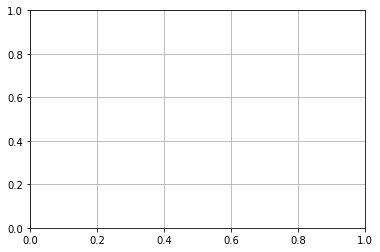

In [0]:
import matplotlib.pyplot as plt

axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
#plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent

plt.plot(x,x_test)
#.plt(x,p_target)

plt.show()

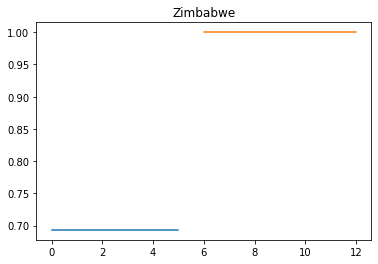

In [0]:
import matplotlib.pyplot as plt
plt.figure()
#plt.plot(x, cases)
plt.plot(x, target)
#plt.plot(x_test, p_conf)
plt.plot(x_test, p_target)
plt.title(c );

In [0]:
model = LinearRegression()
model.fit(x, cases)          
p_conf = model.predict(x_test)

In [0]:
test

array([1.38629436, 1.79175947, 2.07944154, 2.07944154, 2.07944154,
       2.19722458, 2.19722458])

In [0]:
test

,Territory X Date,target,Territory,Date,cases,ConfirmedCases,Fatalities
0,Afghanistan X 4/2/20,0.0,Afghanistan,4/2/20,0.0,237.000000,4.000000
1,Afghanistan X 4/3/20,0.0,Afghanistan,4/3/20,0.0,288.362907,4.667563
2,Afghanistan X 4/4/20,0.0,Afghanistan,4/4/20,0.0,350.810471,5.424254
3,Afghanistan X 4/5/20,0.0,Afghanistan,4/5/20,0.0,426.734877,6.281973
4,Afghanistan X 4/6/20,0.0,Afghanistan,4/6/20,0.0,519.044570,7.254208
...,...,...,...,...,...,...,...
1458,Zimbabwe X 4/4/20,0.0,Zimbabwe,4/4/20,0.0,10.346023,1.000000
1459,Zimbabwe X 4/5/20,0.0,Zimbabwe,4/5/20,0.0,11.739261,1.000000
1460,Zimbabwe X 4/6/20,0.0,Zimbabwe,4/6/20,0.0,13.303582,1.000001
1461,Zimbabwe X 4/7/20,0.0,Zimbabwe,4/7/20,0.0,15.059994,1.000001


In [0]:
submission = test[['Territory X Date', 'target']]
submission.to_csv('/content/drive/My Drive/data/submission26.csv', index=False)
print(submission.shape)

(1463, 2)


In [0]:
valid

,Id,Province_State,Territory,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0


In [0]:
test_df.to_csv('/content/drive/My Drive/data/testing.csv', index=False)

In [0]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

from pathlib import Path

In [0]:
train=train.query('Territory=="Algeria"')

In [0]:
train

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20
...,...,...,...,...,...
14834,Zimbabwe X 3/28/20,1,7,Zimbabwe,3/28/20
14835,Zimbabwe X 3/29/20,1,7,Zimbabwe,3/29/20
14836,Zimbabwe X 3/30/20,1,7,Zimbabwe,3/30/20
14837,Zimbabwe X 3/31/20,1,8,Zimbabwe,3/31/20


In [0]:

grouped = train.groupby('Date')['Date', 'cases', 'target'].sum().reset_index()

fig = px.line(grouped, x="Date", y="cases", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="target", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
formated_gdf = train.groupby(['Date', 'Territory'])['cases', 'target'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['mortalityRate'] = round((formated_gdf['target']/formated_gdf['cases'])*100, 2)

fig = px.scatter_geo(formated_gdf.fillna(0), locations="Territory", locationmode='country names', 
                     color="mortalityRate", size='mortalityRate', hover_name="Territory", 
                     range_color= [0, 10], 
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Taux de mortalité par payé ', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
test = pd.merge(train_client,train, on='client_id', how='left')

In [0]:
    test['Date'] = pd.to_datetime(test['Date'])
    test['year'] = test['Date'].dt.year
    test['month'] = test['Date'].dt.month
    test['day'] = test['Date'].dt.day

In [0]:
covid=covid.query('year==2020 and month==4 and day>=2 and day<=8')

In [0]:
test

,Territory X Date,target,Territory,Date,cases
0,Afghanistan X 4/2/20,4.0,Afghanistan,4/2/20,237.000000
1,Afghanistan X 4/3/20,4.0,Afghanistan,4/3/20,274.509362
2,Afghanistan X 4/4/20,4.0,Afghanistan,4/4/20,317.930289
3,Afghanistan X 4/5/20,4.0,Afghanistan,4/5/20,368.194456
4,Afghanistan X 4/6/20,4.0,Afghanistan,4/6/20,426.380374
...,...,...,...,...,...
1458,Zimbabwe X 4/4/20,1.0,Zimbabwe,4/4/20,10.346609
1459,Zimbabwe X 4/5/20,1.0,Zimbabwe,4/5/20,11.740248
1460,Zimbabwe X 4/6/20,1.0,Zimbabwe,4/6/20,13.305059
1461,Zimbabwe X 4/7/20,1.0,Zimbabwe,4/7/20,15.062068


In [0]:
test

,Territory,year,month,day,cases
0,Afghanistan,2020,4,2,0
1,Afghanistan,2020,4,3,0
2,Afghanistan,2020,4,4,0
3,Afghanistan,2020,4,5,0
4,Afghanistan,2020,4,6,0
...,...,...,...,...,...
1458,Zimbabwe,2020,4,4,0
1459,Zimbabwe,2020,4,5,0
1460,Zimbabwe,2020,4,6,0
1461,Zimbabwe,2020,4,7,0


In [0]:
covid.cases.max()

34272

In [0]:
test['cases']=covid['cases']

In [0]:
test = test.drop(['Territory X Date','target','Date'], axis=1)

In [0]:
from sklearn import preprocessing
for f in test.columns:
    if test[f].dtype=='object' : 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[f].values))
        test[f] = lbl.transform(list(test[f].values))

In [0]:
s1 = pd.merge(test, covid, on=['year', 'month', 'day'])

MemoryError: 

In [0]:
s1

,Territory_x,year,month,day,cases_x,Territory_y,date,cases_y,deaths
0,Afghanistan,2020,4,2,0,Afghanistan,02/04/2020,26,0
1,Afghanistan,2020,4,2,0,Albania,02/04/2020,16,0
2,Afghanistan,2020,4,2,0,Algeria,02/04/2020,263,23
3,Afghanistan,2020,4,2,0,Andorra,02/04/2020,14,2
4,Afghanistan,2020,4,2,0,Angola,02/04/2020,1,0
...,...,...,...,...,...,...,...,...,...
293849,Zimbabwe,2020,4,8,0,Uzbekistan,08/04/2020,107,0
293850,Zimbabwe,2020,4,8,0,Venezuela,08/04/2020,7,2
293851,Zimbabwe,2020,4,8,0,Vietnam,08/04/2020,6,0
293852,Zimbabwe,2020,4,8,0,Zambia,08/04/2020,0,0


In [0]:

    train['Date'] = pd.to_datetime(train['Date'])
    train['year'] = train['Date'].dt.year
    train['month'] = train['Date'].dt.month
    train['day'] = train['Date'].dt.day

In [0]:
target=train['target']

In [0]:
train = train.drop(['target','Territory X Date','Date'], axis=1)


In [0]:
from sklearn import preprocessing
for f in train.columns:
    if valid['Territory'].dtype=='object' : 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(valid['Territory'].values))
        valid['Territory'] = lbl.transform(list(valid['Territory'].values))

In [0]:
from sklearn import preprocessing
for f in train.columns:
    if test['Territory'].dtype=='object' : 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test['Territory'].values))
        test['Territory'] = lbl.transform(list(test['Territory'].values))

In [0]:
target2=train['cases']

In [0]:

train = train.drop(['cases'], axis=1)

In [0]:
train = train.drop(['Territory X Date','Date'], axis=1)

In [0]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(train, target1, test_size = 0.1)

In [0]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()



In [0]:
lmodellineaire.fit(train, target)
#lmodellineaire.fit(train, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
test=test.query('year==2020 and month==4 and day>=2 and day<=8')

In [0]:
train.cases.max()

81661

In [0]:
deces = lmodellineaire.predict(test) 
print(deces)

[64.42992697 65.98427119 67.5386154  ... 37.10644601 38.66079022
 40.21513444]


In [0]:
pred = lmodellineaire1.predict(test) 
print(cases)

[1148.85365391 1182.46421642 1216.07477893 ... 2171.76559838 2205.37616089
 2238.9867234 ]


In [0]:
pred1 = pd.DataFrame(deces)
print(pred1)

              0
0     64.429927
1     65.984271
2     67.538615
3     69.092960
4     70.647304
...         ...
1458  33.997758
1459  35.552102
1460  37.106446
1461  38.660790
1462  40.215134

[1463 rows x 1 columns]


In [0]:
pred1 = pred1.astype(int)

In [0]:
print(pred1)

       0
0     64
1     65
2     67
3     69
4     70
...   ..
1458  33
1459  35
1460  37
1461  38
1462  40

[1463 rows x 1 columns]


In [0]:
pred2 = pd.DataFrame(cases)
print(pred2)

                 0
0      1148.853654
1      1182.464216
2      1216.074779
3      1249.685341
4      1283.295904
...            ...
19641  2104.544473
19642  2138.155036
19643  2171.765598
19644  2205.376161
19645  2238.986723

[19646 rows x 1 columns]


In [0]:
sub

,Territory X Date,target,Territory,Date
0,Afghanistan X 4/2/20,0,Afghanistan,4/2/20
1,Afghanistan X 4/3/20,0,Afghanistan,4/3/20
2,Afghanistan X 4/4/20,0,Afghanistan,4/4/20
3,Afghanistan X 4/5/20,0,Afghanistan,4/5/20
4,Afghanistan X 4/6/20,0,Afghanistan,4/6/20
...,...,...,...,...
1458,Zimbabwe X 4/4/20,0,Zimbabwe,4/4/20
1459,Zimbabwe X 4/5/20,0,Zimbabwe,4/5/20
1460,Zimbabwe X 4/6/20,0,Zimbabwe,4/6/20
1461,Zimbabwe X 4/7/20,0,Zimbabwe,4/7/20


In [0]:
submission = pd.DataFrame({
        "Territory X Date": sub["Territory X Date"],
        "target": pred1[0]
    })
submission.to_csv('r:covid4.csv', index=False)

In [0]:
pred1[0] 

0       64
1       65
2       67
3       69
4       70
        ..
1458    33
1459    35
1460    37
1461    38
1462    40
Name: 0, Length: 1463, dtype: int32

In [0]:
test


,Territory X Date,target,Territory,Date,year,month,day,cases
0,Afghanistan X 4/2/20,53.598150,Afghanistan,2020-04-02,2020,4,2,237.000000
1,Afghanistan X 4/3/20,89.017131,Afghanistan,2020-04-03,2020,4,3,555.521868
2,Afghanistan X 4/4/20,147.413159,Afghanistan,2020-04-04,2020,4,4,1300.330209
3,Afghanistan X 4/5/20,243.691932,Afghanistan,2020-04-05,2020,4,5,3041.935794
4,Afghanistan X 4/6/20,402.428793,Afghanistan,2020-04-06,2020,4,6,7114.379466
...,...,...,...,...,...,...,...,...
1458,Zimbabwe X 4/4/20,1.718378,Zimbabwe,2020-04-04,2020,4,4,9.129803
1459,Zimbabwe X 4/5/20,1.718426,Zimbabwe,2020-04-05,2020,4,5,9.746827
1460,Zimbabwe X 4/6/20,1.718474,Zimbabwe,2020-04-06,2020,4,6,10.401435
1461,Zimbabwe X 4/7/20,1.718522,Zimbabwe,2020-04-07,2020,4,7,11.095915


In [0]:
valid

,Id,Province_State,Territory,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0


In [0]:
train.Date.max()

'3/9/20'

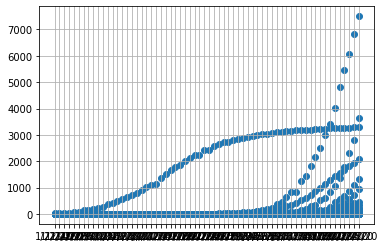

In [0]:
import matplotlib.pyplot as plt
X=train['Date']
Y=train['target']
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

In [0]:
train_invoice=pd.read_csv('d:/train/invoice_train0.csv')


In [0]:
test_client=pd.read_csv('d:/train/client_test.csv')


In [0]:
test_invoice=pd.read_csv('d:/train/invoice_test.csv')


MemoryError: 

In [0]:
for df in [train_invoice,test_invoice]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])
    df['year'] = df['invoice_date'].dt.year
    df['month'] = df['invoice_date'].dt.month

In [0]:
d={"ELEC":0,"GAZ":1}
train_invoice['counter_type']=train_invoice['counter_type'].map(d)

In [0]:
d={"ELEC":0,"GAZ":1}
test_invoice['counter_type']=test_invoice['counter_type'].map(d)

In [0]:
aggs = {}
aggs['consommation_level_1'] = ['sum','max','min','mean','std']
aggs['consommation_level_2'] = ['sum','max','min','mean','std']
aggs['consommation_level_3'] = ['sum','max','min','mean','std']
aggs['consommation_level_4'] = ['sum','max','min','mean','std']

aggs['month'] = ['mean', 'max', 'min', 'std']
aggs['year'] = ['nunique','max','min','mean']

aggs['months_number'] = ['max','min','mean','sum']
aggs['reading_remarque'] = ['max','min','mean','std','sum']
aggs['counter_coefficient'] = ['max', 'min','mean']
aggs['counter_number'] = ['nunique']
aggs['counter_type'] = ['nunique','mean','sum']
aggs['counter_statue'] = ['nunique']
aggs['tarif_type'] = ['nunique','max','min']
aggs['counter_code'] = ['nunique','max','mean','min']


aggs['old_index'] = ['nunique','mean','std']
aggs['old_index'] = ['nunique','mean','std']

In [0]:
train = train_invoice.groupby(['client_id']).agg(aggs)
test = test_invoice.groupby(['client_id']).agg(aggs)


In [0]:
agg_train = pd.merge(train_client,train, on='client_id', how='left')
agg_test = pd.merge(test_client,test, on='client_id', how='left')


In [0]:
agg_test.head()

,disrict,client_id,client_catg,region,creation_date,"(consommation_level_1, sum)","(consommation_level_1, max)","(consommation_level_1, min)","(consommation_level_1, mean)","(consommation_level_1, std)",...,"(tarif_type, nunique)","(tarif_type, max)","(tarif_type, min)","(counter_code, nunique)","(counter_code, max)","(counter_code, mean)","(counter_code, min)","(old_index, nunique)","(old_index, mean)","(old_index, std)"
0,62,test_Client_0,11,307,28/05/2002,18061,1090,0,488.135135,230.388942,...,1,11,11,1,203,203.000000,203,36,11389.837838,5401.043096
1,69,test_Client_1,11,103,06/08/2009,24011,3600,11,1091.409091,739.185437,...,1,11,11,1,433,433.000000,433,22,29380.772727,17638.422718
2,62,test_Client_10,11,310,07/04/2004,40999,1200,0,554.040541,346.775891,...,2,40,11,2,207,119.648649,5,74,11774.054054,10987.377541
3,60,test_Client_100,11,101,08/10/1992,9774,721,0,244.350000,247.253171,...,2,40,11,2,203,104.000000,5,39,13623.725000,13242.361986
4,62,test_Client_1000,11,301,21/07/1977,30114,2400,0,568.188679,486.891871,...,2,40,11,2,203,135.754717,5,52,13927.471698,14371.199312


In [0]:
target=agg_train['target']


In [0]:
agg_train = agg_train.drop(['target','creation_date'], axis=1)
agg_test = agg_test.drop(['creation_date'], axis=1)


In [0]:
from sklearn import preprocessing
for f in agg_train.columns:
    if agg_train[f].dtype=='object' : 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(agg_train[f].values))
        agg_train[f] = lbl.transform(list(agg_train[f].values))
        

In [0]:
from sklearn import preprocessing
for f in agg_test.columns:
    if agg_test[f].dtype=='object' : 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(agg_test[f].values))
        agg_test[f] = lbl.transform(list(agg_test[f].values))
        

# model de classification forest


In [0]:
from sklearn.ensemble import RandomForestClassifier



In [0]:
forest = RandomForestClassifier()


In [0]:
agg_train.fillna(agg_train.mean(), inplace=True)

In [0]:
agg_test.fillna(agg_test.mean(), inplace=True)

In [0]:
forest = forest.fit(agg_train[:3000000],target[:3000000])

In [0]:
# Make predictions
pred = forest.predict_proba(agg_test)
print(pred)

[[0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 ...
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]]


In [0]:
pred = pd.DataFrame(pred)
print(pred)

         0    1
0      0.9  0.1
1      0.9  0.1
2      1.0  0.0
3      0.9  0.1
4      0.7  0.3
...    ...  ...
58064  0.9  0.1
58065  1.0  0.0
58066  0.4  0.6
58067  1.0  0.0
58068  1.0  0.0

[58069 rows x 2 columns]


In [0]:
submission = pd.DataFrame({
        "client_id": sub["client_id"],
        "target": pred[1]
    })
submission.to_csv('r:steg.csv', index=False)